# LP_1 PROJECT
## BUSINESS UNDERSTANDING

# Business Background

India has emerged as a thriving hub for startups, offering a diverse landscape that attracts investors and entrepreneurs alike. With a surge in innovative ventures across various sectors, the Indian startup ecosystem has garnered significant attention globally. This growing landscape presents lucrative opportunities for new entrants seeking to explore this dynamic marketplace.
ODYSSEY Inc., a company known for its strategic investments and ventures, is eyeing the Indian startup ecosystem for potential opportunities. With a keen interest in understanding the underlying factors influencing startup funding, ODYSSEY Inc. aims to conduct a comprehensive analysis focused on deciphering the impact of geographical locations on funding received by startups.


# Business Objective

The primary objective is to discern the correlation between the geographical location of startups within India and the funding they secure. By analyzing funding data spanning from 2018 to 2021, ODYSSEY Inc. seeks to uncover patterns and trends that delineate how different regions or cities within India contribute to the funding dynamics of startups.
Specifically, the key objectives include:
1.	Geographical Analysis: Explore and evaluate the distribution of startups across various Indian regions or cities to ascertain concentration and dispersion trends.
2.	Funding Patterns: Investigate the funding trends concerning startups in different geographical locations, aiming to identify any disparities or notable correlations.
3.	Impact Assessment: Determine the significance of geographical location as a factor influencing the funding amounts received by startups.
4.	Strategic Insights: Provide actionable insights derived from the analysis to guide ODYSSEY Inc.'s strategic decisions regarding potential investments or engagements within the Indian startup ecosystem.
Through this in-depth analysis, ODYSSEY Inc. endeavors to gain a nuanced understanding of the Indian startup landscape, leveraging data-driven insights to make informed decisions regarding potential partnerships, investments, or strategic collaborations within this vibrant and burgeoning ecosystem.


# HYPOTHESIS

Null Hypothesis (H0): Receiving more funds by startups in India is independent of their location.


Alternative Hypothesis (H1): Receiving more funds by startups in India depends on their location.

### QUESTIONS

1. What is the trend in the amount of funding received by Indian startups over the years?

2. Which sectors received the highest amount of funding in India from 2018 to 2021?

3. Do startups in specific sectors, such as e-commerce, fintech, healthcare, or agriculture, receive more funding
based on their location?

4. Is there a significant difference in funding amounts received by startups in different locations within India?

5. What are the top 10 companies with the highest funding?

6. What is the average amount of funds received by Indian startups at different stages of their life cycle?

7. What are the startups that received the highest funding each year?

8. Are there any patterns in the location of a company's headquarters and the amount of funding it receives?



In [320]:
! pip install openpyxl


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


REQUIREMENT LIBRARIES

In [321]:
#importing for EDA,cleaning
import pandas as pd
import numpy as np
import pyodbc
from dotenv import  dotenv_values
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer

#importing for T-test statistic test
from scipy import stats

# to view all max df
pd.set_option('display.max_rows',None) 

#importing for visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

LOADING  DATA FROM SOURCES (sql & csv)

In [322]:
#PULLING VARIABLES from .env 
environment_variables = dotenv_values('.env')
 
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
 
 # lets get a connection for our SQL quarries
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

connection = pyodbc.connect(connection_string)

In [323]:
#Data from db.2020
quary = '''
        SELECT *
        FROM dbo.LP1_startup_funding2020

        '''


data_2020 = pd.read_sql(quary,connection)
#pd.set_option('display.max_rows',None)
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [324]:
#Data from db.2021
quary_2 = '''
        SELECT *
        FROM dbo.LP1_startup_funding2021

        '''
data_2021 = pd.read_sql(quary_2, connection)
data_2021.head()
#pd.set_option("display.max.row,1055")

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [325]:
#read CSV files data from 2018
data_2018 = pd.read_csv("startup_funding2018.csv")
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [326]:
#read CSV files data from 2019
data_2019 = pd.read_csv("startup_funding2019.csv")
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


## DATA CLEANING & EDA


In [327]:
#Data from db.2020
quary = '''
        SELECT *
        FROM dbo.LP1_startup_funding2020

        '''


data_2020 = pd.read_sql(quary,connection)
pd.set_option('display.max_rows',1050) #full view of rows

#convert to dataframe
df_2020 = pd.DataFrame(data_2020)
df_2020.head()


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [328]:
#lets clean the 2020 data we are to add year col & check dublicates and drop col finally NAN values and Amount col

#droping col 
columns_drop = ['Founders', 'Founded', 'Investor','column10']
df_2020 = df_2020.drop(columns=columns_drop)


#add a year col in the data 
Year = [2020]*len(df_2020)
df_2020["Year"] = Year

# we rename col 
new_column_name = {'Company_Brand':'Company/Brand',
                  'What_it_does':'What it does' }
df_2020 = df_2020.rename(columns=new_column_name) 

df_2020


,Company/Brand,HeadQuarter,Sector,What it does,Amount,Stage,Year
0,Aqgromalin,Chennai,AgriTech,Cultivating Ideas for Profit,200000.0,None,2020
1,Krayonnz,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,100000.0,Pre-seed,2020
2,PadCare Labs,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,NaN,Pre-seed,2020
3,NCOME,New Delhi,Escrow,Escrow-as-a-service platform,400000.0,None,2020
4,Gramophone,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,340000.0,None,2020
...,...,...,...,...,...,...,...
1050,Leverage Edu,Delhi,Edtech,AI enabled marketplace that provides career gu...,1500000.0,None,2020
1051,EpiFi,None,Fintech,It offers customers with a single interface fo...,13200000.0,Seed Round,2020
1052,Purplle,Mumbai,Cosmetics,Online makeup and beauty products retailer,8000000.0,None,2020
1053,Shuttl,Delhi,Transport,App based bus aggregator serice,8043000.0,Series C,2020


In [329]:
# this data has duplicates
df_2020 = df_2020.drop_duplicates()

# this data does not have any duplicates
df_2020.duplicated().sum()

0

In [330]:
df_2020.isna().sum()

Company/Brand      0
HeadQuarter       93
Sector            13
What it does       0
Amount           253
Stage            460
Year               0
dtype: int64

In [331]:
# Replace 'None' with 'Undisclosed'
null_columns = df_2020[['HeadQuarter','Stage','Sector']].astype(str)
null_columns = null_columns.applymap(lambda x: x.replace('None','Undisclosed') if isinstance(x, str) else x)

# a SimpleImputer object with the missing_values parameter set to mode
imputer = SimpleImputer(strategy='most_frequent', missing_values='Undisclosed'  )

# Apply the imputer to fill null values 
df_2020[null_columns.columns] = imputer.fit_transform(null_columns)
df_2020[['HeadQuarter','Stage','Sector']].head()

,HeadQuarter,Stage,Sector
0,Chennai,Series A,AgriTech
1,Bangalore,Pre-seed,EdTech
2,Pune,Pre-seed,Hygiene management
3,New Delhi,Series A,Escrow
4,Indore,Series A,AgriTech


In [332]:
df_2020.isna().sum()

Company/Brand      0
HeadQuarter        0
Sector             0
What it does       0
Amount           253
Stage              0
Year               0
dtype: int64

In [333]:
df_2020['Amount'] = df_2020['Amount'].replace('0', np.nan, regex=True)

In [334]:
# Select Amount columns with null values 
null_columns = ["Amount"]

# a SimpleImputer to fill na numeric values wih 0
imputer = SimpleImputer(strategy='median', missing_values= np.nan)

# Apply the imputer to fill null values in selected columns
df_2020[null_columns] = imputer.fit_transform(df_2020[null_columns])
df_2020["Amount"].head()

0     200000.0
1     100000.0
2    3000000.0
3     400000.0
4     340000.0
Name: Amount, dtype: float64

In [335]:
df_2020['Amount'].isna().sum()

0

In [336]:
#function to fommat Amount col

def format_amount(value):
    try:
        float_value = float(value)  # convert the value to a float
        formatted_value = "${:,.0f}".format(float_value)  # If successful, format it as currency with $ before the number
        return formatted_value
    except ValueError:
        return value  # If the conversion fails, return the original value
    
# Apply the format_amount function to the 'Amount' column
df_2020['Amount'] = df_2020['Amount'].apply(lambda x: format_amount(x))

df_2020.head()

,Company/Brand,HeadQuarter,Sector,What it does,Amount,Stage,Year
0,Aqgromalin,Chennai,AgriTech,Cultivating Ideas for Profit,"$200,000",Series A,2020
1,Krayonnz,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"$100,000",Pre-seed,2020
2,PadCare Labs,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,"$3,000,000",Pre-seed,2020
3,NCOME,New Delhi,Escrow,Escrow-as-a-service platform,"$400,000",Series A,2020
4,Gramophone,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"$340,000",Series A,2020


In [337]:
#Data from db.2021
quary_2 = '''
        SELECT *
        FROM dbo.LP1_startup_funding2021

        '''
data_2021 = pd.read_sql(quary_2, connection)

#convert to dataframe
df_2021 = pd.DataFrame(data_2021)

df_2021.head()



,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [338]:
#again clean the 2021 data we are to add year col & check dublicates and drop col finally NAN values 

#droping col 
columns_drop = ['Founders', 'Founded', 'Investor']
df_2021 = df_2021.drop(columns=columns_drop)


#add a year col in the data 
Year = [2021]*len(df_2021)
df_2021["Year"] = Year

# we rename col 
new_column_name = {'Company_Brand':'Company/Brand',
                  'What_it_does':'What it does' }
df_2021 = df_2021.rename(columns=new_column_name) 

df_2021


,Company/Brand,HeadQuarter,Sector,What it does,Amount,Stage,Year
0,Unbox Robotics,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"$1,200,000",Pre-series A,2021
1,upGrad,Mumbai,EdTech,UpGrad is an online higher education platform.,"$120,000,000",None,2021
2,Lead School,Mumbai,EdTech,LEAD School offers technology based school tra...,"$30,000,000",Series D,2021
3,Bizongo,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"$51,000,000",Series C,2021
4,FypMoney,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...","$2,000,000",Seed,2021
...,...,...,...,...,...,...,...
1204,Gigforce,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,$3000000,Pre-series A,2021
1205,Vahdam,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,$20000000,Series D,2021
1206,Leap Finance,Bangalore,Financial Services,International education loans for high potenti...,$55000000,Series C,2021
1207,CollegeDekho,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",$26000000,Series B,2021


In [339]:
# this data has duplicates
df_2021 = df_2021.drop_duplicates()

# this data does not have any duplicates
df_2021.duplicated().sum()

0

In [340]:
df_2021.isna().sum()

Company/Brand      0
HeadQuarter        1
Sector             0
What it does       0
Amount             3
Stage            421
Year               0
dtype: int64

In [341]:
# Now, 'Undisclosed' values need to be converted to NaN, and missing values are filled to be filled with 0

# Replaced 'Undisclosed' values with NaN
df_2021['Amount'] = df_2021['Amount'].replace('Undisclosed', np.nan)

# Change the "Amount" column to str, removing the dollar signs and commas
df_2021['Amount'] = df_2021['Amount'].replace('[\$,]', '', regex=True).astype(str)

# SimpleImputer with fill_value=0
imputer = SimpleImputer(strategy='constant', fill_value=0)

# Reshape the Amount column to a 2D array for imputation
amount_values = df_2021['Amount'].values.reshape(-1, 1)

# imputation and get a 2D array
imputed_amount_values = imputer.fit_transform(amount_values)

# Assign the Amount column in the with the imputed values
df_2021['Amount'] = imputed_amount_values.flatten()  # Flatten the 2D array to 1D and assign it back 




In [342]:
df_2021['Amount']

0         1200000
1       120000000
2        30000000
3        51000000
4         2000000
          ...    
1204      3000000
1205     20000000
1206     55000000
1207     26000000
1208      8000000
Name: Amount, Length: 1189, dtype: object

In [343]:

df_2021['Amount'].isna().sum()


0

In [344]:
# Replace 'None' with 'Undisclosed'
null_columns = df_2021[['HeadQuarter','Stage']].astype(str)
null_columns = null_columns.applymap(lambda x: x.replace('None','Undisclosed') if isinstance(x, str) else x)

# a SimpleImputer object with the fill_values parameter set to mode
imputer = SimpleImputer(strategy='most_frequent', missing_values='Undisclosed'  )

# Apply the imputer to fill null values 
df_2021[null_columns.columns] = imputer.fit_transform(null_columns)
df_2021[['HeadQuarter','Stage']].head()

,HeadQuarter,Stage
0,Bangalore,Pre-series A
1,Mumbai,Seed
2,Mumbai,Series D
3,Mumbai,Series C
4,Gurugram,Seed


In [345]:
df_2021[['HeadQuarter','Stage']].isna().sum()

HeadQuarter    0
Stage          0
dtype: int64

In [346]:
# Amount col Formatting function to add commas to currency values
def format_currency(value):
    try:
        # Convert the string value to a float, removing any commas and dollar signs
        numeric = float(value.replace(',', '').replace('$', ''))
        # Format the numeric value as currency with commas and a dollar sign
        formatted_value = "${:,.0f}".format(numeric)
        return formatted_value
    except ValueError:
        # If fails, return the original value
        return value

# Apply the formatting function to the 'Amount' col
df_2021['Amount'] = df_2021['Amount'].apply(format_currency)
df_2021

,Company/Brand,HeadQuarter,Sector,What it does,Amount,Stage,Year
0,Unbox Robotics,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"$1,200,000",Pre-series A,2021
1,upGrad,Mumbai,EdTech,UpGrad is an online higher education platform.,"$120,000,000",Seed,2021
2,Lead School,Mumbai,EdTech,LEAD School offers technology based school tra...,"$30,000,000",Series D,2021
3,Bizongo,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"$51,000,000",Series C,2021
4,FypMoney,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...","$2,000,000",Seed,2021
...,...,...,...,...,...,...,...
1204,Gigforce,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"$3,000,000",Pre-series A,2021
1205,Vahdam,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,"$20,000,000",Series D,2021
1206,Leap Finance,Bangalore,Financial Services,International education loans for high potenti...,"$55,000,000",Series C,2021
1207,CollegeDekho,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...","$26,000,000",Series B,2021


In [347]:
# data 2019
data_2019 = pd.read_csv("startup_funding2019.csv")
#convert to dataframe
df_2019 = pd.DataFrame(data_2019)
df_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [348]:
#again clean the 2019 data we are to add year col & check dublicates and drop col finally NAN values and rename col 

#droping col 
columns_drop = ['Founders', 'Founded', 'Investor']
df_2019 = df_2019.drop(columns=columns_drop)


#add a year col in the data 
Year = [2019]*len(df_2019)
df_2019["Year"] = Year

# we rename amount($) col 
new_column_name = {'Amount($)':'Amount'}
df_2019 = df_2019.rename(columns=new_column_name) 

df_2019.head()

,Company/Brand,HeadQuarter,Sector,What it does,Amount,Stage,Year
0,Bombay Shaving,NaN,Ecommerce,Provides a range of male grooming products,"$6,300,000",NaN,2019
1,Ruangguru,Mumbai,Edtech,A learning platform that provides topic-based ...,"$150,000,000",Series C,2019
2,Eduisfun,Mumbai,Edtech,It aims to make learning fun via games.,"$28,000,000",Fresh funding,2019
3,HomeLane,Chennai,Interior design,Provides interior designing solutions,"$30,000,000",Series D,2019
4,Nu Genes,Telangana,AgriTech,"It is a seed company engaged in production, pr...","$6,000,000",NaN,2019


In [349]:
# this data does not have any duplicates
df_2019.duplicated().sum()

0

In [350]:
df_2019.isna().sum()

Company/Brand     0
HeadQuarter      19
Sector            5
What it does      0
Amount            0
Stage            46
Year              0
dtype: int64

In [351]:
# Select columns with null values 
null_columns = ['Sector', 'HeadQuarter', 'Stage']

# a SimpleImputer object with the missing_values parameter set to nan

imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
# Apply the imputer to fill null values in selected columns
df_2019[null_columns] = imputer.fit_transform(df_2019[null_columns])
df_2019[['Sector','HeadQuarter','Stage']].head()

,Sector,HeadQuarter,Stage
0,Ecommerce,Bangalore,Series A
1,Edtech,Mumbai,Series C
2,Edtech,Mumbai,Fresh funding
3,Interior design,Chennai,Series D
4,AgriTech,Telangana,Series A


In [352]:
#now clean up NAN values in this df
df_2019.isna().sum()





Company/Brand    0
HeadQuarter      0
Sector           0
What it does     0
Amount           0
Stage            0
Year             0
dtype: int64

In [353]:
# data  2018
data_2018 = pd.read_csv("startup_funding2018.csv")

#convert to dataframe
df_2018=pd.DataFrame(data_2018)
df_2018.tail()

,Company Name,Industry,Round/Series,Amount,Location,About Company
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...
525,Netmeds,"Biotechnology, Health Care, Pharmaceutical",Series C,35000000,"Chennai, Tamil Nadu, India",Welcome to India's most convenient pharmacy!


In [354]:
#we add the year col 
Year = [2018]*len(df_2018)
df_2018["Year"] = Year

# we rename col s
new_column_names = {
    'Company Name': 'Company/Brand',
    'Industry': 'Sector',
    'Round/Series': 'Stage',
    'Location': 'HeadQuarter',
    'About Company': 'What it does'
}
df_2018 = df_2018.rename(columns=new_column_names) 
df_2018.tail()

,Company/Brand,Sector,Stage,Amount,HeadQuarter,What it does,Year
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,2018
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,2018
525,Netmeds,"Biotechnology, Health Care, Pharmaceutical",Series C,35000000,"Chennai, Tamil Nadu, India",Welcome to India's most convenient pharmacy!,2018


In [355]:
df_2018.isna().sum()

Company/Brand    0
Sector           0
Stage            0
Amount           0
HeadQuarter      0
What it does     0
Year             0
dtype: int64

In [356]:
#we change the fomat and replace the "-" with unsettled 
df_2018["Amount"] = df_2018["Amount"].str.replace("—", "Undisclosed", regex=True) 

#formatting lambda function replacing values 
format_currency = lambda value: value if value == 'Undisclosed' else "${:,.0f}".format(float(value.replace('₹', '').replace(',', '').replace('$', ''))) if isinstance(value, str) else value

# Apply the lambda function 
df_2018['Amount'] = df_2018['Amount'].apply(format_currency)
df_2018.head()

,Company/Brand,Sector,Stage,Amount,HeadQuarter,What it does,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,"$250,000","Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"$40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"$65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,"$2,000,000","Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,Undisclosed,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018


In [357]:
# this data has duplicates
df_2018 = df_2018.drop_duplicates()

# this data does not have any duplicates
df_2018.duplicated().sum()


0

In [358]:
# split HeadQuarter  and Sector  into list and get first item
df_2018['Sector'] = df_2018['Sector'].str.split(',').str[0]
df_2018['HeadQuarter'] = df_2018['HeadQuarter'].str.split(',').str[0]

df_2018[['HeadQuarter','Sector']].head()

,HeadQuarter,Sector
0,Bangalore,Brand Marketing
1,Mumbai,Agriculture
2,Gurgaon,Credit
3,Noida,Financial Services
4,Hyderabad,E-Commerce Platforms


In [359]:
#now clean up NAN values in this df
df_2018.isna().sum()



Company/Brand    0
Sector           0
Stage            0
Amount           0
HeadQuarter      0
What it does     0
Year             0
dtype: int64

In [360]:
df_2018.head()

,Company/Brand,Sector,Stage,Amount,HeadQuarter,What it does,Year
0,TheCollegeFever,Brand Marketing,Seed,"$250,000",Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Agriculture,Seed,"$40,000,000",Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Credit,Series A,"$65,000,000",Gurgaon,Leading Online Loans Marketplace in India,2018
3,PayMe India,Financial Services,Angel,"$2,000,000",Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed,Undisclosed,Hyderabad,Eunimart is a one stop solution for merchants ...,2018


CONCAT DATASETS

In [361]:
df_coc = pd.concat([df_2018,df_2019,df_2020,df_2021])

#reset index of the conc dataset
df_coc = df_coc.reset_index(drop=True)
df_coc

,Company/Brand,Sector,Stage,Amount,HeadQuarter,What it does,Year
0,TheCollegeFever,Brand Marketing,Seed,"$250,000",Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Agriculture,Seed,"$40,000,000",Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Credit,Series A,"$65,000,000",Gurgaon,Leading Online Loans Marketplace in India,2018
3,PayMe India,Financial Services,Angel,"$2,000,000",Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed,Undisclosed,Hyderabad,Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
2848,Gigforce,Staffing & Recruiting,Pre-series A,"$3,000,000",Gurugram,A gig/on-demand staffing company.,2021
2849,Vahdam,Food & Beverages,Series D,"$20,000,000",New Delhi,VAHDAM is among the world’s first vertically i...,2021
2850,Leap Finance,Financial Services,Series C,"$55,000,000",Bangalore,International education loans for high potenti...,2021
2851,CollegeDekho,EdTech,Series B,"$26,000,000",Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021


In [362]:
# Replace values with NaN
df_coc['Amount'] = df_coc['Amount'].replace('Undisclosed', np.nan, regex=True)

# Remove currency symbols and commas
df_coc['Amount'] = df_coc['Amount'].str.replace('₹', '').str.replace('$', '').str.replace(',', '')

# Convert the 'Amount' column to numeric values (float)
df_coc['Amount'] = pd.to_numeric(df_coc['Amount'], errors='coerce')


df_coc['Amount'].head()


0      250000.0
1    40000000.0
2    65000000.0
3     2000000.0
4           NaN
Name: Amount, dtype: float64

In [363]:

df_coc['Amount'] = df_coc['Amount'].replace('2E+10', np.nan, regex=True)
df_coc['Amount'] = df_coc['Amount'].replace('1.5392E+10', np.nan, regex=True)
df_coc['Amount'] = df_coc['Amount'].replace('7E+10', np.nan, regex=True)
df_coc['Amount'] = df_coc['Amount'].replace('1.5E+11', np.nan, regex=True)

df_coc['Amount']

0         250000.0
1       40000000.0
2       65000000.0
3        2000000.0
4              NaN
           ...    
2848     3000000.0
2849    20000000.0
2850    55000000.0
2851    26000000.0
2852     8000000.0
Name: Amount, Length: 2853, dtype: float64

In [364]:
# Select Amount columns with null values 
null_columns = ["Amount"]

# a SimpleImputer to fill na wih median
imputer = SimpleImputer(strategy='median', missing_values= np.nan)

# Apply the imputer to fill null values in selected columns
df_coc[null_columns] = imputer.fit_transform(df_coc[null_columns])
df_coc["Amount"].head()

0      250000.0
1    40000000.0
2    65000000.0
3     2000000.0
4     3000000.0
Name: Amount, dtype: float64

In [365]:
# Replace '.0' and convert to int64
df_coc['Amount'] = df_coc['Amount'].apply(lambda x: str(x).replace('.0',''))
df_coc['Amount'] = df_coc['Amount'].astype(np.int64)
df_coc["Amount"].head()

0      250000
1    40000000
2    65000000
3     2000000
4     3000000
Name: Amount, dtype: int64

In [366]:
# this data has duplicates
df_coc = df_coc.drop_duplicates()

# this data does not have any duplicates
df_coc.duplicated().sum()

0

In [367]:
# we rename amount to amount($) col 
new_column_name = {'Amount':'Amount($)'}
df_coc = df_coc.rename(columns=new_column_name)

#check null
df_coc.isna().sum()

Company/Brand    0
Sector           0
Stage            0
Amount($)        0
HeadQuarter      0
What it does     0
Year             0
dtype: int64

### Data Cleaning Summary 

1. Drop col[Founders,Founded,Investor,colunm10] in 2019, 2020 & 2021 dataset. 

2. Then created a new column for "year" in all datasets.

3. Renamed all columns appropriately in all dataset

4. Concantinated the four datasets into one using 'pd.conc'.

5. We reset index of the Concantinated dataset

6. Removed duplicates from the combined data set

7. Changed the formatting of the "Amount" col in 2020,2021 dataset and imputed the missing values  using descriptive statistic method 'Median' 

8. Finally, we did not drop any nan values in the "Stage" colunm beacouse it accounted for over 40% of the dataset year under review

...



# EDA


In [368]:
# check data type
df_coc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2852 entries, 0 to 2852
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2852 non-null   object
 1   Sector         2852 non-null   object
 2   Stage          2852 non-null   object
 3   Amount($)      2852 non-null   int64 
 4   HeadQuarter    2852 non-null   object
 5   What it does   2852 non-null   object
 6   Year           2852 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 178.2+ KB


In [369]:
# Changing 'Year' column to datetime
df_coc['Year'] = pd.to_datetime(df_coc['Year'], format='%Y')
 
# Verifying the changes
print(df_coc.dtypes)

Company/Brand            object
Sector                   object
Stage                    object
Amount($)                 int64
HeadQuarter              object
What it does             object
Year             datetime64[ns]
dtype: object


In [370]:
#lets see shape
df_coc.shape

(2852, 7)

In [371]:
# Select only numeric columns 
numeric_df_coc = df_coc.select_dtypes(include=['number'])

numeric_df_coc.corr()


,Amount($)
Amount($),1.0


In [372]:
df_coc.describe(include = 'all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Company/Brand,2852,2214,BharatPe,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,2852,595,FinTech,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,2852,75,Seed,1018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount($),2852.0,NaN,NaN,NaN,127925609.850982,7500.0,1300000.0,3000000.0,10205000.0,150000000000.0,3140202566.596338
HeadQuarter,2852,141,Bangalore,970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What it does,2852,2691,BYJU'S is an educational technology company th...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,2852,NaN,NaN,NaN,2020-01-07 16:30:07.573632512,2018-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,2021-01-01 00:00:00,2021-01-01 00:00:00,NaN


In [373]:
#check for correction
df_coc['Company/Brand'].value_counts()

Company/Brand
BharatPe                        10
Zomato                           7
Trell                            6
Vedantu                          6
Spinny                           6
                                ..
Reliance Retail Ventures Ltd     1
Chargebee                        1
Credit Wise Capital              1
Uni                              1
WeRize                           1
Name: count, Length: 2214, dtype: int64

In [374]:
#Standardize specific enteries in the Company/Brand col to ensure consistency
df_coc['Company/Brand'] = df_coc['Company/Brand'].replace({ "byju's": "byju's",
                                                             "byju": "byju's",
                                                              "mobile premier league": "mobile premier league (mpl)",
                                                               "mpl": "mobile premier league (mpl)",
                                                                "truebalance": "true balance",
                                                                "reliance retail": "reliance retail ventures"}) 

In [375]:
#check if applied
df_coc['Company/Brand'].value_counts()

Company/Brand
BharatPe                        10
Zomato                           7
Trell                            6
Vedantu                          6
Spinny                           6
                                ..
Reliance Retail Ventures Ltd     1
Chargebee                        1
Credit Wise Capital              1
Uni                              1
WeRize                           1
Name: count, Length: 2214, dtype: int64

In [376]:
#check for correction
df_coc['Sector'].value_counts()

Sector
FinTech                                                                                                                                       173
EdTech                                                                                                                                        147
Fintech                                                                                                                                        98
Financial Services                                                                                                                             86
Edtech                                                                                                                                         77
E-commerce                                                                                                                                     73
Automotive                                                                                                           

In [377]:
# Replace '-' value with NaN
df_coc['Sector'] = df_coc['Sector'].replace('—', np.nan, regex=True)

# Select Sector columns with null values 
null_columns = ["Sector"]

# a SimpleImputer to fill na wih mode
imputer = SimpleImputer(strategy='most_frequent', missing_values = np.nan)

# Apply the imputer to fill null values in selected columns
df_coc[null_columns] = imputer.fit_transform(df_coc[null_columns])

#now remove some unwanted values in the col 
unwanted_values = ['Manchester, Greater Manchester', 
                   'Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience', 
                   "MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.", 
                   'Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.']

df_coc = df_coc[~df_coc['Sector'].isin(unwanted_values)]




In [378]:
df_coc['Sector'] = df_coc['Sector'].str.lower()

In [379]:
# Standardize specific enteries in the Sector column to ensure consistency
df_coc['Sector'] = df_coc['Sector'].replace({
    "ecommerce": "e-commerce",
    'e-commerce platforms': "e-commerce",
    'agtech': 'agritech',
    'edttech': 'edtech',
    'edtech startup': 'edtech',
    'hr tech startup': 'hr tech',
    'hrtech': 'hr tech',
    "saas startup": "saas",
    'saas  startup': "saas",
    'taas startup': "saas",
    'saas/edtech': "saas",
    'ai startup': 'ai',
    'ai health': 'ai',
    'ai company': 'ai',
    'ai robotics': 'ai',
    'ai chatbot': 'ai',
    'ai platform': 'ai',
    'tech startup': 'tech',
    'tech company': 'tech',
    'transportation': 'logistics',
    'logistics & supply chain': 'logistics',
    'supply chain, agritech': 'logistics',
    'transport': 'logistics',
    'gaming startup': 'games',
    'computer games': 'games',
    'gaming': 'games',
    'online games': 'games',
    'food & beverages ':'food industry',
    'it startup': 'it ',
    'it company': 'it ',
    'food': 'food industry',
    'food processing': 'food industry',
    'food production': 'food industry',
    'food diet': 'food industry',
    'food delivery':'food industry',
    'crypto': 'cryptocurrency',
    'beverage': 'food industry',
    'b2b manufacturing ': 'b2b',
    'b2b travel ': 'b2b',
    'b2b marketplace': 'b2b',
    'b2b ecommerce': 'b2b',
    'b2b agritech': 'b2b',
    'b2b travel': 'b2b',
    'b2b startup': 'b2b',
    'b2b supply chain': 'b2b',
    'b2b e-commerce': 'b2b',
    'd2c fashion': 'd2c',
    'd2c startup': 'd2c',
    'd2c jewellery': 'd2c',
    'd2c business': 'd2c',
    'blockchain startup': 'blockchain',
    'retail startup': 'retail',
    'iot startup': 'iot',
    'iot platform': 'iot',
    'sport startup': 'sport',
    'health, wellness & fitness': 'health',
    'hospital & health care ': 'health care',
    'Information Technology & Services': 'it',
    'insurance': 'financial services',
    'apparel & fashion': 'fashion',
    'fashion startup': 'fashion',
    'fashion and lifestyle': 'fashion',
    'milk startup': 'dairy',
    'nft marketplace': 'nft',
    'insurtech':'insuretech'})

In [380]:
# Convert only the first letter of each sector name to uppercase
df_coc['Sector'] = df_coc['Sector'].str.title()

In [381]:
#check if applied
df_coc['Sector'].value_counts()

Sector
Fintech                                 301
Edtech                                  229
E-Commerce                              119
Financial Services                       96
Logistics                                71
Healthcare                               66
Agritech                                 63
Healthtech                               60
Saas                                     60
Tech                                     57
Automotive                               53
Ai                                       51
Games                                    46
Food Industry                            39
Food & Beverages                         38
E-Learning                               35
Information Technology & Services        34
Computer Software                        31
Fashion                                  30
Health Care                              29
B2B                                      29
Consumer Goods                           29
Retail                   

In [382]:
#chek for correction
df_coc['HeadQuarter'].value_counts()

HeadQuarter
Bangalore                                                   970
Mumbai                                                      467
Gurugram                                                    238
New Delhi                                                   230
Chennai                                                     106
Pune                                                        104
Delhi                                                        88
Noida                                                        86
Gurgaon                                                      80
Hyderabad                                                    76
Bengaluru                                                    57
Ahmedabad                                                    29
Jaipur                                                       28
Haryana                                                      26
Kolkata                                                      22
Indore                      

In [383]:
# split HeadQuarter into list and get first item
df_coc['HeadQuarter'] = df_coc['HeadQuarter'].str.split(',').str[0]

# strip the \t#REF! and replacing some values
df_coc['HeadQuarter'] = df_coc['HeadQuarter'].apply(lambda x: str(x).replace('Small Towns','Andhra Pradesh ')).apply(lambda x: str(x).replace('Gurugram\t#REF!','Gurugram'))


#now remove some unwanted values in the col as sector values
unwanted_values = ['Computer Games', 
                   'Pharmaceuticals', 
                   'Food & Beverages', 
                   'Information Technology & Services\t#REF!', 
                   'Online Media\t#REF!',
                   'San Franciscao',]
df_coc= df_coc[~df_coc['HeadQuarter'].isin(unwanted_values)]


In [384]:
# check if applied
df_coc['HeadQuarter'].value_counts()

HeadQuarter
Bangalore                 970
Mumbai                    467
Gurugram                  238
New Delhi                 230
Chennai                   106
Pune                      104
Delhi                      88
Noida                      86
Gurgaon                    80
Hyderabad                  76
Bengaluru                  57
Jaipur                     31
Ahmedabad                  29
Haryana                    26
Kolkata                    22
Thane                      14
Indore                     14
Chandigarh                 10
Kochi                       8
Gujarat                     8
San Francisco               6
Ahmadabad                   6
Coimbatore                  5
Bangalore City              5
Jodhpur                     5
California                  5
Lucknow                     4
Singapore                   4
Andheri                     4
Goa                         4
Ghaziabad                   4
New York                    4
India                       

In [385]:
#check for correction
df_coc['Stage'].value_counts()

Stage
Seed                                                                                                       1014
Series A                                                                                                    809
Pre-series A                                                                                                208
Series B                                                                                                    134
Series C                                                                                                    112
Seed Round                                                                                                   69
Pre series A                                                                                                 62
Pre-seed                                                                                                     58
Series D                                                                                          

In [386]:

 
#now remove some unwanted values in the col as sector values
unwanted_values = ['$300000',
                   '$6000000',
                   '$1000000',
                   'Secondary Market',
                   'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
                   '$000000',]
df_coc = df_coc[~df_coc['Stage'].isin(unwanted_values)]

In [387]:
df_coc['Stage'] = df_coc['Stage'].replace({
    'Series A': 'Series A',
    'Seed': 'Seed',
    'Seed Round': 'Seed',
    'Series B': 'Series B',
    'Pre series A': 'Pre-Series A',
    'Pre-series A': 'Pre-Series A',
    'Series C': 'Series C',
    'Series D': 'Series D',
    'Debt': 'Debt',
    'Pre Series A': 'Pre-Series A',
    'Pre-seed': 'Pre-Seed',
    'Seed round': 'Seed',
    'Series E': 'Series E',  'Pre-series A1': 'Pre-Series A',
    'Pre-series A': 'Pre-Series A',
    'Pre-series B': 'Pre-Series B',
    'Pre-seed': 'Pre-Seed',
    'Seed+': 'Seed',
    'Pre-series': 'Pre-Series',
    'Seies A': 'Series A',
    'Series A2': 'Series A',
    'Early seed': 'Seed',
    'Series F1': 'Series F',
    'Series F2': 'Series F',
    'Series B3': 'Series B',
    'Series A+': 'Series A',
    'Series D1': 'Series D',
    'Bridge': 'Bridge',
    'Series F': 'Series F',
    'Pre-series B': 'Pre-Series B',
    'Angel Round': 'Angel Round',
    'Pre seed round': 'Pre-Seed',
    'Pre-seed Round': 'Pre-Seed',
    'Pre series B': 'Pre-Series B',
    'Pre-Seed': 'Pre-Seed',
    'Seed Funding': 'Seed Funding',
    'Series B2': 'Series B',
    'Pre-series C': 'Pre-Series C',
    'Seed funding': 'Seed Funding',
    'Pre-Series B': 'Pre-Series B',
    'Seed Round & Series A': 'Seed',
    'Series C, D': 'Series C',
    'Mid series': 'Mid Series',
    'Series D1': 'Series D',
    'Seed Investment': 'Seed Funding',
    'Pre series C': 'Pre-Series C',
    'Pre-series': 'Pre-Series',
    'Bridge Round': 'Bridge',
    'Series H': 'Series H',
    'Seed A': 'Seed',
    'Pre- series A': 'Pre-Series A',
    'Series E2': 'Series E',
    'Pre series A1': 'Pre-Series A',
    'Edge': 'Edge',
    'Pre seed Round': 'Pre-Seed',
    'Series A-1': 'Series A',
    'Post-IPO Debt': 'Debt',
    'Undisclosed': 'Venture - Series Unknown',
    'Post-IPO Equity': 'Private Equity',
    'Debt Financing': 'Debt',
    'Non-equity Assistance': 'Grant',
})

In [388]:
#check if applied
df_coc['Stage'].value_counts()

Stage
Seed                        1097
Series A                     813
Pre-Series A                 288
Series B                     137
Series C                     113
Pre-Seed                      73
Debt                          60
Series D                      52
Venture - Series Unknown      39
Angel                         37
Series E                      30
Pre-Series B                  18
Series F                      13
Private Equity                13
Bridge                         9
Corporate Round                8
Seed Funding                   6
Grant                          5
Angel Round                    4
Series H                       4
Pre-Series                     3
Pre-Series C                   3
Series G                       3
Series B+                      1
Seed fund                      1
Post series A                  1
Fresh funding                  1
Edge                           1
Funding Round                  1
Mid Series                     1
PE  

In [389]:
# Select Stage columns with null values 
null_columns = ["Stage"]

# a SimpleImputer to fill na wih mode
imputer = SimpleImputer(strategy='most_frequent', missing_values = np.nan)

# Apply the imputer to fill null values in selected columns
df_coc[null_columns] = imputer.fit_transform(df_coc[null_columns])

In [390]:
# check null values
df_coc.isna().sum()

Company/Brand    0
Sector           0
Stage            0
Amount($)        0
HeadQuarter      0
What it does     0
Year             0
dtype: int64

In [391]:
#duplicates
df_coc.duplicated().sum()

print('There is',df_coc.duplicated().sum(),'in the dataset')

There is 0 in the dataset


In [392]:
df_coc.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Year
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018-01-01
1,Happy Cow Dairy,Agriculture,Seed,40000000,Mumbai,A startup which aggregates milk from dairy far...,2018-01-01
2,MyLoanCare,Credit,Series A,65000000,Gurgaon,Leading Online Loans Marketplace in India,2018-01-01
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,2018-01-01
4,Eunimart,E-Commerce,Seed,3000000,Hyderabad,Eunimart is a one stop solution for merchants ...,2018-01-01


### save the clean df_coc to csv file 

In [393]:



cleaned_df_coc = df_coc

csv_file_path = r"C:\Users\Public\Documents\startup_funding2018.csv"

cleaned_df_coc.to_csv(csv_file_path, encoding='utf-8', sep=",", index=False)


In [394]:
data = pd.read_csv(r"C:\Users\Public\Documents\startup_funding2018.csv")
data

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Year
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018-01-01
1,Happy Cow Dairy,Agriculture,Seed,40000000,Mumbai,A startup which aggregates milk from dairy far...,2018-01-01
2,MyLoanCare,Credit,Series A,65000000,Gurgaon,Leading Online Loans Marketplace in India,2018-01-01
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,2018-01-01
4,Eunimart,E-Commerce,Seed,3000000,Hyderabad,Eunimart is a one stop solution for merchants ...,2018-01-01
...,...,...,...,...,...,...,...
2832,Gigforce,Staffing & Recruiting,Pre-Series A,3000000,Gurugram,A gig/on-demand staffing company.,2021-01-01
2833,Vahdam,Food & Beverages,Series D,20000000,New Delhi,VAHDAM is among the world’s first vertically i...,2021-01-01
2834,Leap Finance,Financial Services,Series C,55000000,Bangalore,International education loans for high potenti...,2021-01-01
2835,CollegeDekho,Edtech,Series B,26000000,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021-01-01


### Observations made from the data

* Identified some of the categorical variable in the dataset (Company/Brand,Sector,HeadQuater and Year) and one continoues variable (Amount($))

* Looking at the dataset some of the cols count_values had to be removed 

* According to web research Foreign Investments especially in Usa,Europe and south Asia are In Indian Startups.On the HQ col we split and take first values and remove unwanted value location same as the stage col

* convert the int dtype of year col to date

* the hq and sector col mapping of values was done 

# Questions

### 1. What is the trend in the amount of funding received by Indian startups over the years?

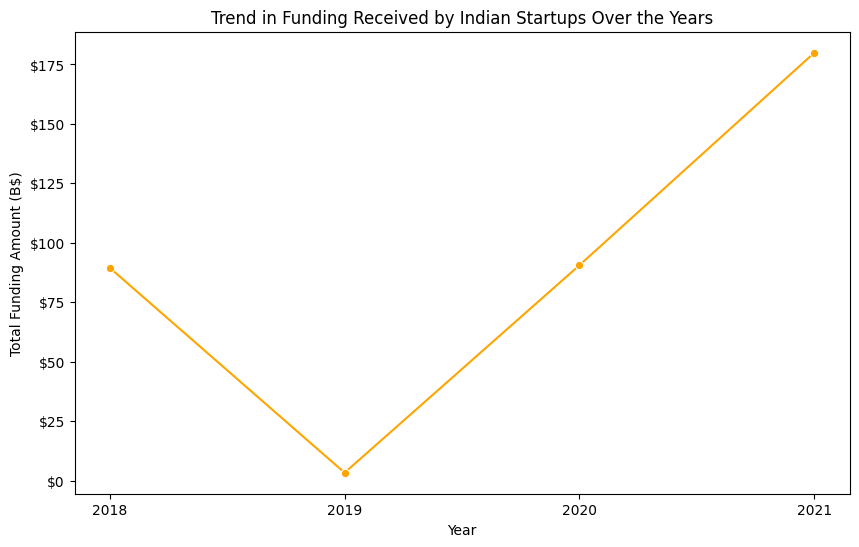

In [395]:
#grouping the year and strip the time and sum of amount
grouped_data = df_coc.groupby(df_coc['Year'].dt.strftime('%Y'))['Amount($)'].sum().reset_index()

# Convert 'Amount ($)' to billions with two significant figures and dividing by 1 billion
grouped_data['Amount($)'] = grouped_data['Amount($)'] / 1e9 


# Plotting the trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Amount($)', data= grouped_data, marker='o',color='orange')
plt.title('Trend in Funding Received by Indian Startups Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount (B$)')
plt.grid(False)
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.show()

Based on our observations, there has been a consistent upward trend in the amount of funding received by Indian startups since 2019. The increasing trend in fundings over the years suggests a growing and promising Indian startup ecosystem. In light of this insight, ODYSSEY Inc. is positioned to venture into the Indian market, leveraging the positive trajectory of funding in the region

### 2. Which sectors  received the highest amount of funding in India from 2018 to 2021?


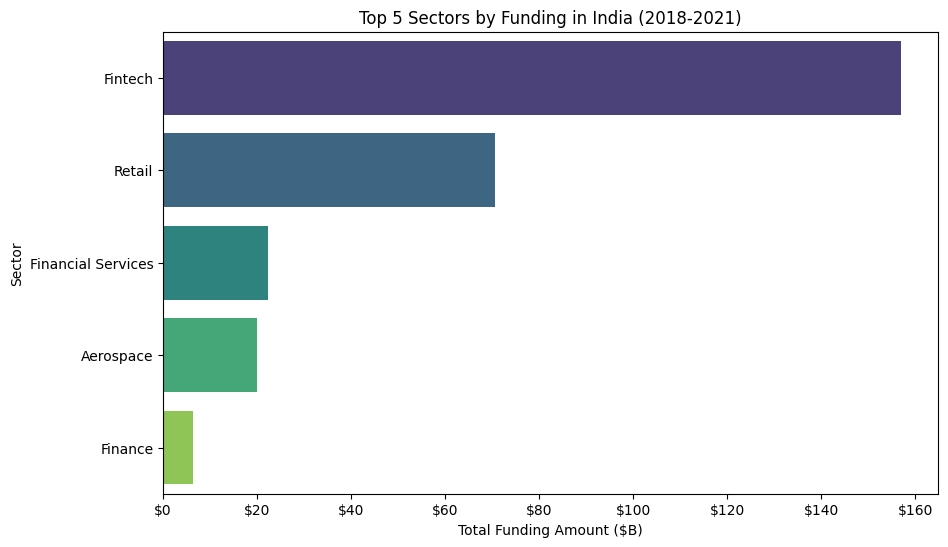

In [396]:
# Filter data for the years 2018 to 2021 
filtered_data = df_coc[df_coc['Year'].dt.year.isin([2018, 2019, 2020, 2021])]
 
# Group data by sector and sum the amounts
sector_data = filtered_data.groupby('Sector')['Amount($)'].sum().reset_index()
 
# Sort data by amount in descending order
sector_data = sector_data.sort_values(by='Amount($)', ascending=False)
 
# Selecting the top 5 sectors
top_5_sectors = sector_data.head(5)
 
# Convert 'Amount ($)' to billions with two significant figures and dividing by 1 billion
top_5_sectors['Amount($)'] = top_5_sectors['Amount($)'] / 1e9  
 
# Plotting 
plt.figure(figsize=(10, 6))
sns.barplot(x='Amount($)', y='Sector', data=top_5_sectors, palette='viridis')
plt.gca().xaxis.set_major_formatter('${x:,.0f}')
plt.title('Top 5 Sectors by Funding in India (2018-2021)')
plt.xlabel('Total Funding Amount ($B)')
plt.ylabel('Sector')
plt.grid(False)
plt.show()
 
 



Based on our observations, the fintech sector stands out as the predominant recipient of startup funding. Recognizing this trend, ODYSSEY Inc. can leverage this insight by exploring opportunities within the technology industry for startup funding while venturing into the Indian ecosystem.

### 3. 	Do Startups in certain sectors tend to receive more funding than others based on their location

<Figure size 1200x800 with 0 Axes>

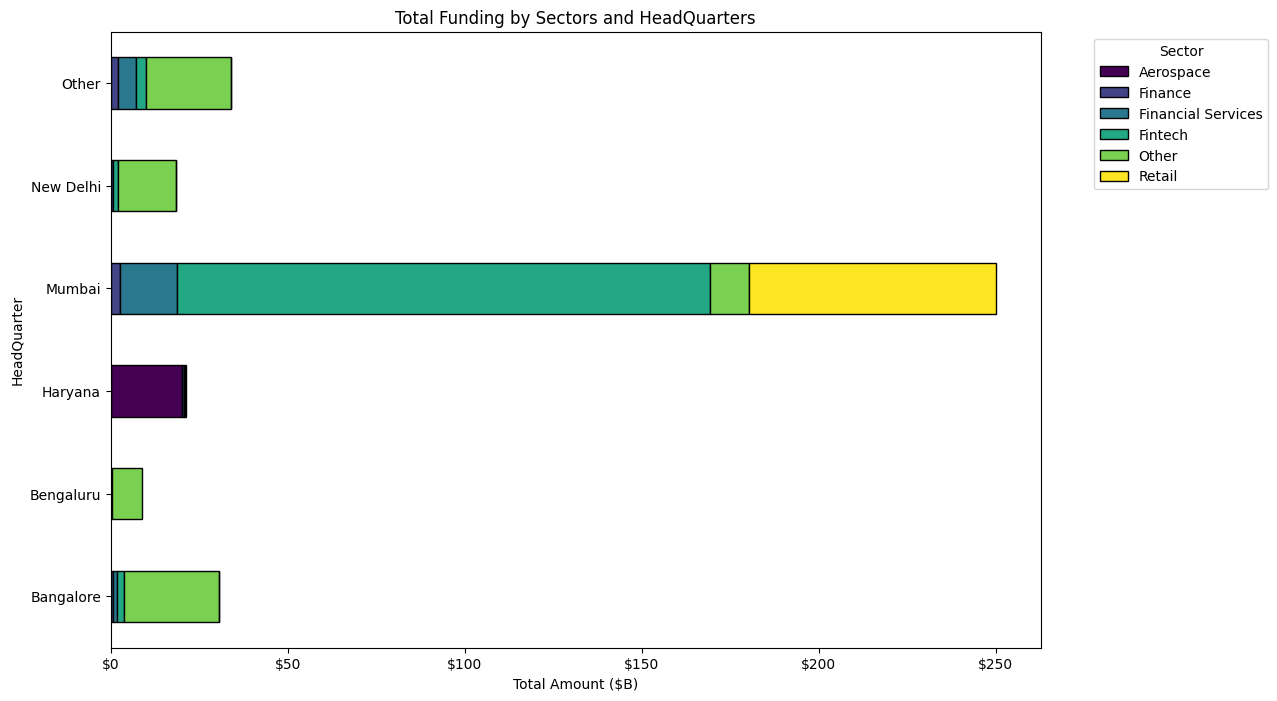

In [397]:

# Group by 'Sector, 'HeadQuarter' and calculate the total funding for each group
# 'agg'function to apply different aggregation functions to different columns.  
grouped_df = df_coc.groupby(['Sector', 'HeadQuarter']).agg({'Amount($)': 'sum', 'Year': 'first'}).reset_index()

# get the top sectors with the highest total funding
top_5 = 5 
top_sectors = grouped_df.groupby('Sector')['Amount($)'].sum().nlargest(top_5).index

# Create a column 'Sector_grouped' to categorize sectors from top sector
grouped_df['Sector_grouped'] = grouped_df['Sector'].apply(lambda x: x if x in top_sectors else 'Other')

# the top HeadQuarters with the highest total funding
top_hq = grouped_df.groupby('HeadQuarter')['Amount($)'].sum().nlargest(top_5).index

# Create a new column 'HQ_grouped' to categorize HeadQuarters from top hq
grouped_df['HQ_grouped'] = grouped_df['HeadQuarter'].apply(lambda x: x if x in top_hq else 'Other')

# Aggregate data before pivoting
pivot_df = grouped_df.groupby(['HQ_grouped', 'Sector_grouped'])['Amount($)'].sum().unstack().fillna(0)

# Convert 'Amount ($)' to billions with two significant figures and dividing by 1 billion
pivot_df = pivot_df / 1e9

# Plotting
plt.figure(figsize=(12, 8))
#sns.set(style="whitegrid")
ax = pivot_df.plot(kind='barh', stacked=True, colormap='viridis', edgecolor='k', figsize=(12, 8))
ax.set_ylabel('HeadQuarter')
ax.set_xlabel('Total Amount ($B)')
ax.set_title('Total Funding by Sectors and HeadQuarters')
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax.grid(False)

#plot legend (sector)
ax.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### 4. What is the total funding amounts received by startups in different locations within India?


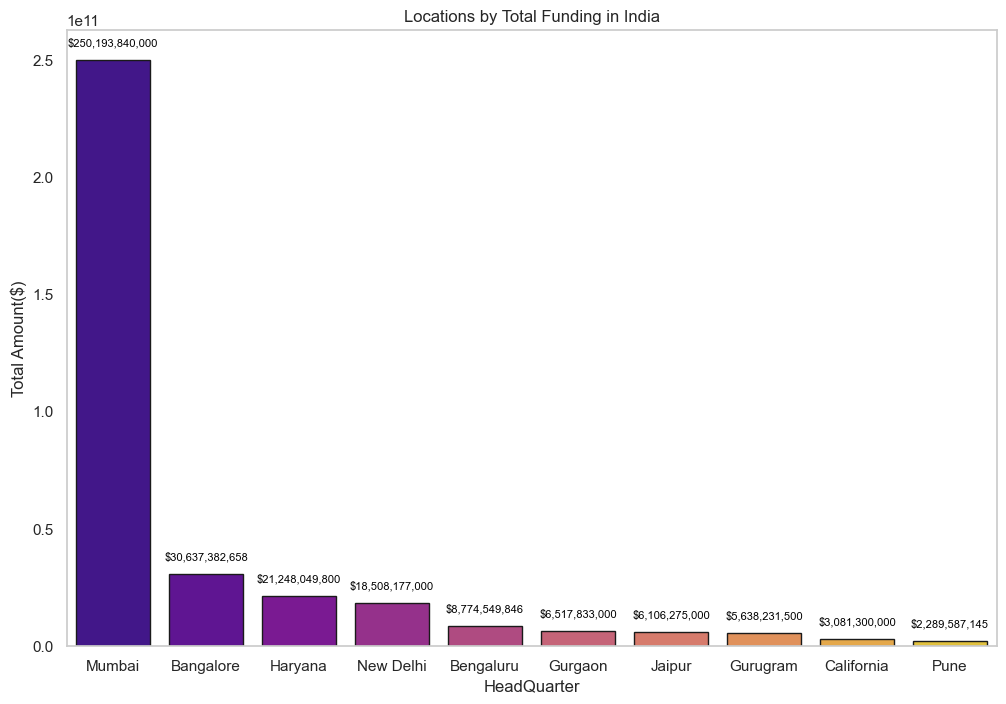

In [398]:
# get top hq with the highest total funding
top = 10
top_hq = df_coc.groupby('HeadQuarter')['Amount($)'].sum().nlargest(top).index

# Filter to include only the top locations
df_top_hq = df_coc[df_coc['HeadQuarter'].isin(top_hq)]

# Group by 'HeadQuarter' and calculate the total funding for each location
hq_funding = df_top_hq.groupby('HeadQuarter')['Amount($)'].sum().sort_values(ascending=False).reset_index()

# Plotting 
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
ax = sns.barplot(x='HeadQuarter', y='Amount($)', data=hq_funding, palette='plasma', edgecolor='k')
ax.set_xlabel('HeadQuarter')
ax.set_ylabel('Total Amount($)')
ax.set_title(f'Locations by Total Funding in India')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right') 
ax.grid(False)

# Add annotations 
for i, value in enumerate(hq_funding['Amount($)']):
    formatted_value = "${:,.0f}".format(value)  
    ax.text(i, value + 0.02 * max(hq_funding['Amount($)']), formatted_value,
            ha='center', va='bottom', color='black', fontsize=8)

plt.show()



Observing that Mumbai stands out with the highest startup funding among various locations, it is evident that there is a notable disparity in funding across different regions. This underscores the significance of considering location as a crucial factor for startup ventures, making it essential for Odyssey Inc. as they explore opportunities within the Indian ecosystem.

### 5. What are the top 10 companies with the highest funding?

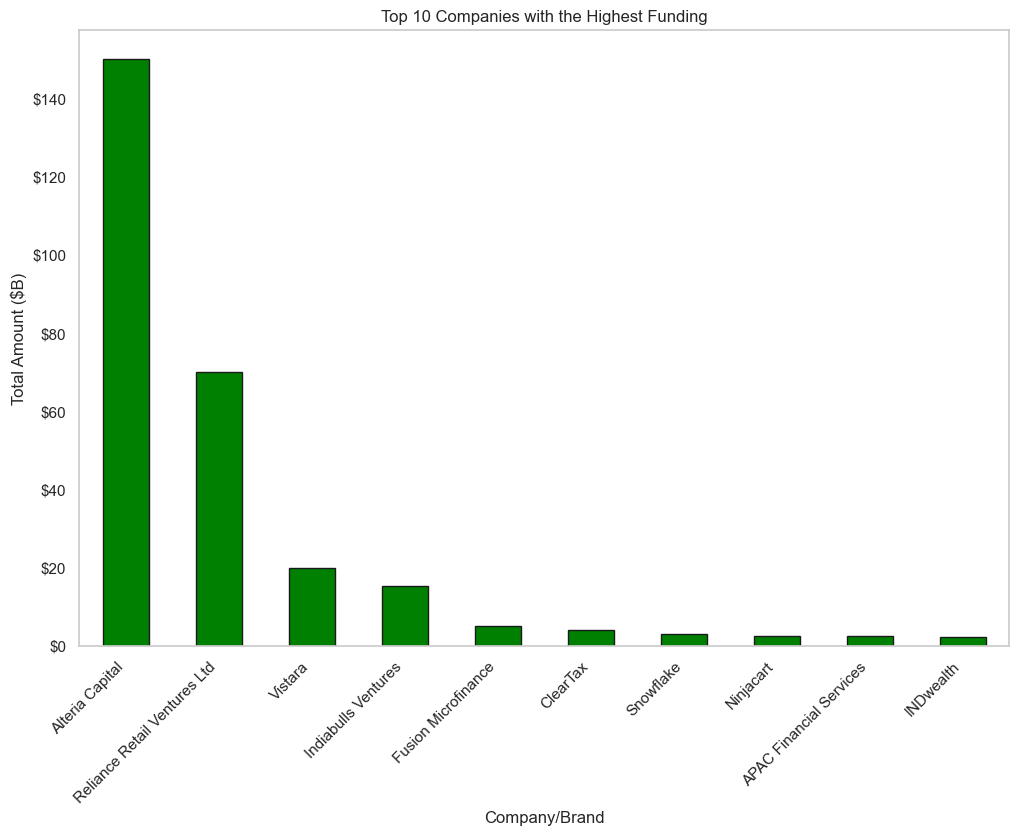

In [399]:

# get top 10 companies with the highest funding
top_10= 10
top_companies = df_coc.groupby('Company/Brand')['Amount($)'].sum().nlargest(top_10).index

# Filter to include only the top companies
df_top_companies = df_coc[df_coc['Company/Brand'].isin(top_companies)]

# Group by 'Company/Brand' and calculate the total funding for each company
company_funding = df_top_companies.groupby('Company/Brand')['Amount($)'].sum().sort_values(ascending=False)

# Convert 'Amount ($)' to billions with two significant figures and dividing by 1 billion
company_funding = company_funding / 1e9  

# Plotting
plt.figure(figsize=(12, 8))
ax = company_funding.plot(kind='bar', color='green', edgecolor='k')
plt.xlabel('Company/Brand')
plt.ylabel('Total Amount ($B)')
plt.title('Top 10 Companies with the Highest Funding')
plt.xticks(rotation=45, ha='right') 
plt.grid(False)

#Format x-axis ticks with commas and USD
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.show()

Upon analysis, we've identified the top 10 leading companies/brands in the Indian ecosystem. This insight provides Odyssey Inc. with valuable information about key competitors within the ecosystem, allowing them to strategize and distinguish themselves effectively.

### 6. What is the top 10 stages average amount of funds received by Indian startups 

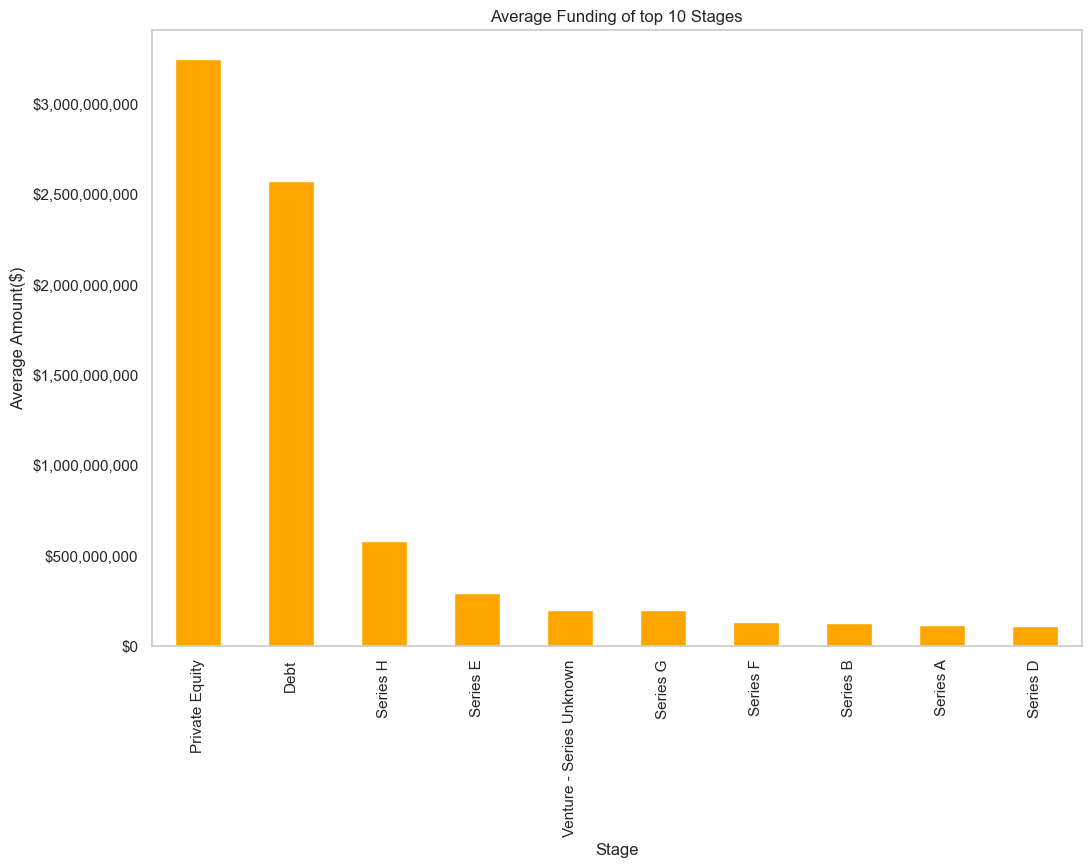

In [400]:

# get top 10 stages with the highest mean funding
top_10= 10
top_stage =df_coc.groupby('Stage')['Amount($)'].mean().nlargest(top_10).index

# Filter to include only the top stages
df_top_stage = df_coc[df_coc['Stage'].isin(top_stage)]

# Group by 'Stage' and calculate the total funding for each company
stage_average_funding = df_top_stage.groupby('Stage')['Amount($)'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
ax = stage_average_funding.plot(kind='bar', color='orange')
plt.xlabel('Stage')
plt.ylabel('Average Amount($)')
plt.title('Average Funding of top 10 Stages')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.grid(False)
plt.show()


### 7. What are the startups that received the highest funding each year?

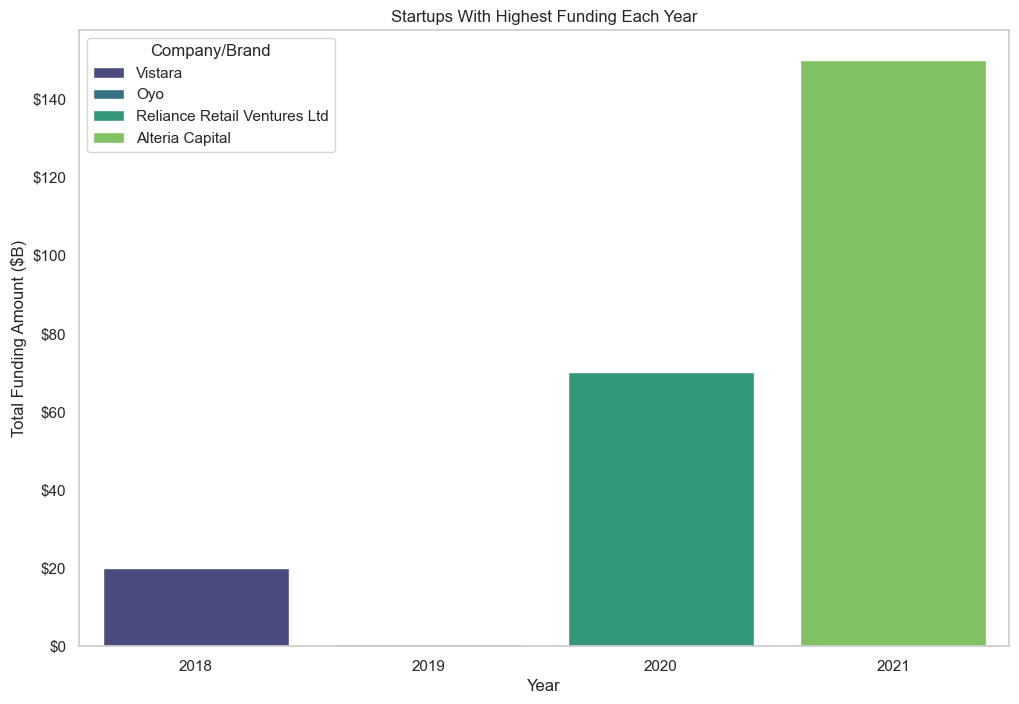

In [401]:
# format Year using strftime
df_coc['Year'] = df_coc['Year'].dt.strftime('%Y')

# Group by Year and get the startup with the highest funding each year
startup_each_year = df_coc.loc[df_coc.groupby('Year')['Amount($)'].idxmax()]
 
# Convert 'Amount ($)' to billions with two significant figures and dividing by 1 billion
startup_each_year['Amount($)'] = startup_each_year['Amount($)'] / 1e9  

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Amount($)', hue='Company/Brand', data=startup_each_year, palette='viridis') #hue to represent the company variable using colour
plt.xlabel('Year')
plt.ylabel('Total Funding Amount ($B)')
plt.title('Startups With Highest Funding Each Year')
plt.grid(False)
plt.gca().yaxis.set_major_formatter('${x:,.0f}')

plt.show()

Observing the data, it's evident that startups such as Alteria Capital consistently secured the highest funding across all years, notably in 2021. Additionally, each year showcases a distinct set of startups without notable recurring ones or new entrants. Odyssey Inc. can leverage this insight to strategically navigate and explore opportunities within the dynamic Indian startup ecosystem.

### 8. Are there any patterns in the location of a company's headquarters and the amount of funding it receives?

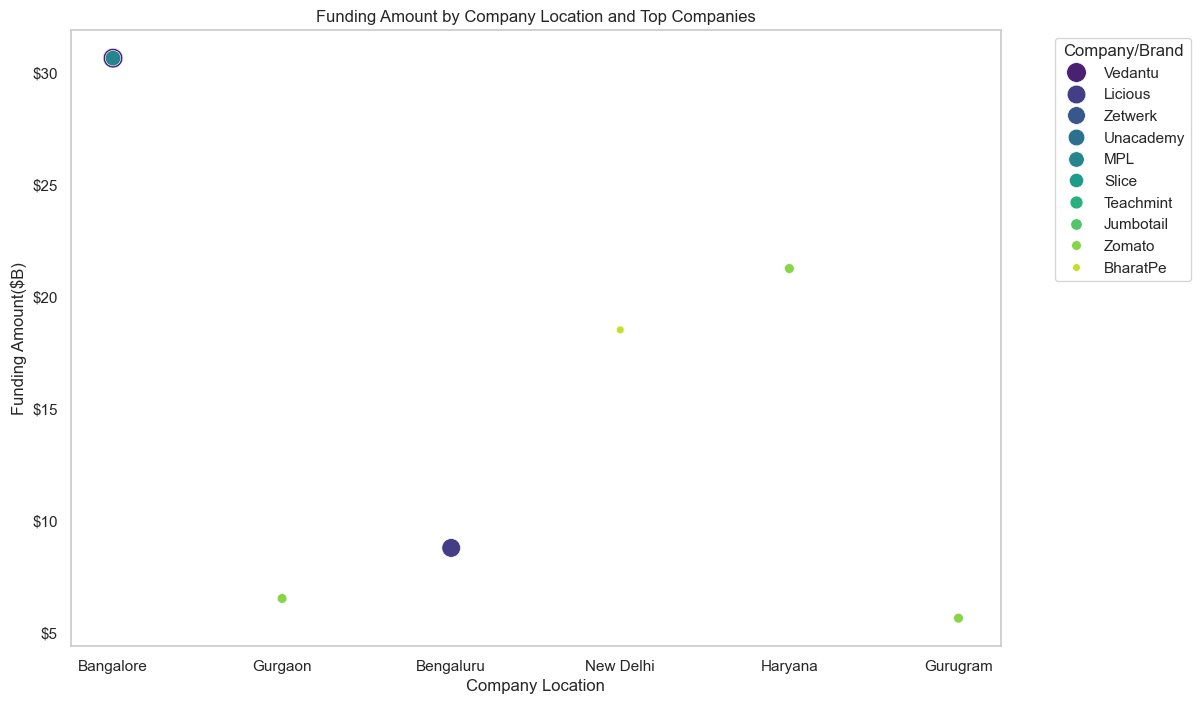

In [402]:
# Group by 'HeadQuarter' and calculate the total funding for each location
hq_funding = df_coc.groupby('HeadQuarter')['Amount($)'].sum().reset_index()

# get the top Company/Brand values based on total funding
top_companies = df_coc['Company/Brand'].value_counts().nlargest(10).index
df_coc_top_companies = df_coc[df_coc['Company/Brand'].isin(top_companies)]

# Keep only the top hq based on total funding
top_hq = hq_funding.nlargest(10, 'Amount($)')

# Merge the top hq back into the original DataFrame
df_coc_top_locations = pd.merge(df_coc, top_hq, on='HeadQuarter', how='inner', suffixes=('_original', '_top'))

# filter the top Company/Brand values based on total funding within the top locations
top_companies_in_top_locations = df_coc_top_locations['Company/Brand'].value_counts().nlargest(10).index
df_coc_top_locations_top_companies = df_coc_top_locations[df_coc_top_locations['Company/Brand'].isin(top_companies_in_top_locations)]

# Convert 'Amount ($)' to billions with two significant figures and dividing by 1 billion
df_coc_top_locations_top_companies['Amount($)_top'] = df_coc_top_locations_top_companies['Amount($)_top'] / 1e9  

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(x='HeadQuarter', y='Amount($)_top', hue='Company/Brand', data=df_coc_top_locations_top_companies, palette='viridis', size='Company/Brand', sizes=(30, 200))

plt.xlabel('Company Location')
plt.ylabel('Funding Amount($B)')
plt.title('Funding Amount by Company Location and Top Companies')
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.grid(False)
plt.legend(title='Company/Brand', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Upon observation of the scatter plot depicting the relationship between a company's headquarters location and the funding it receives, a positive trend is discernible. This trend is characterized by an upward movement from left to right.

### Statistic test (t-test) 

In [403]:
#According to a report by LinkedIn, Mumbai is the top location receiving funding in the Indian ecosystem from 2018 to 2021,
#with a total funding of $231.53 billion. Bangalore is the second-highest funded location, with $24.52 billion in funding.
#Other top-funded locations include Gurugram, New Delhi, and California.

# group Amount based on HeadQuarter 
Mumbai_group = df_coc[df_coc['HeadQuarter'] == 'Mumbai']['Amount($)']
Other_group = df_coc[df_coc['HeadQuarter'].isin(['Bangalore','Gurugram','New Delhi','California'])]['Amount($)'] 



In [404]:
# Testing
t_stats , p_value = stats.ttest_ind(Mumbai_group,Other_group)
print("p-value:",p_value)
print("t_stats:",t_stats)
if (p_value<0.05):
    print('Reject null hypothesis: Receiving more funds independant on location.')
else:
    print('We do not have enough evidence to reject the null hypothesis.')

p-value: 0.014027765518700904
t_stats: 2.4588250143010124
Reject null hypothesis: Receiving more funds independant on location.


### Hypothesis observation

There is sufficient evidence to reject the null hypothesis, indicating that the assertion "Receiving more funds is independent of location for startups in India" is not supported. Instead, the alternative hypothesis, suggesting that "Receiving more funds is dependent of location for startups in India", is favored.